# Change runtime type to R

Remember, the first step when opening a Google Colab notebook is to change the runtime type to R from Python. Our code will not work otherwise!

# New package to use: easystats

This package includes many useful functions to help simplify our tasks. It is a big install, it took 2 minutes to load on my Google Colab on the first installation. There are other affiliated packages that are part of this easystats ecosystem, we may have to install them in later parts of the course.

Let's install the package

In [1]:
## Install the easystats package
install.packages("easystats")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘patchwork’, ‘bayestestR’, ‘correlation’, ‘datawizard’, ‘effectsize’, ‘insight’, ‘modelbased’, ‘parameters’, ‘performance’, ‘report’, ‘see’




# Load the packages for this demonstration

Let's load the following packages today:

- dplyr

- easystats

- ggplot2

In [9]:
## Load each of the packages
library(dplyr)
library(easystats)
library(ggplot2)

# Generate our dataset

In this demonstration, our dataset is fake so we need to run the lines of code below to generate it. The data includes three variables:

1) The Dependent Variable (A.K.A. the DV, outcome, criterion, y-variable) is the amount of candy collected during Halloween.

2) The first Independent Variable (A.K.A. the IV, predictor, x-variable) is age of the child in years (5 to 18 years old)

3) The second IV is a rating of how good a child's costume looked from 1 (worst) to 5 (best).

In [11]:
## Set the seed so that you will get the same data as me
set.seed(800) ## Boo

## Create some Tricky (but not treat-y) data
TrickyData <-
  data.frame("Candy" = rnorm(n = 250, mean = 35, sd = 7)) %>%
  mutate(Age     = (Candy * -1 + 50) / 2 + rnorm(250, 0, 4),
         Age     = floor(Age),
         Costume = .1 * Candy + rnorm(250, mean = 0, sd = 1),
         Candy   = round(Candy, digits = 0)) %>%
    filter(Age < 18 & Age > 5)

## Examine the data
head(TrickyData, 10) %>% round(2)

,Candy,Age,Costume
,<dbl>,<dbl>,<dbl>
1,42,7,5.23
2,35,9,3.55
3,31,8,2.61
4,28,8,1.58
5,36,15,2.65
6,32,8,2.39
7,32,7,3.02
8,35,6,3.62
9,27,13,2.65


# Descriptive and summary statistics

Descriptive statistics are simple, they are generally the mean and standard deviation of the continuous variables of interest.

We can use many options:

- the summarize() function to specify which functions used to summarize the data.

- describe_distribution() to compute just about any descriptive statistic we would want.

In [12]:
## Return the descriptive statistics for the variables
TrickyData %>%
  summarize(AvgCandy = mean(Candy), SDCandy = sd(Candy),
            AvgAge = mean(Age), SDAge = sd(Age),
            AvgCostume = mean(Costume), SDCostume = sd(Costume)) %>% t()

AvgCandy,32.972973
SDCandy,6.046246
AvgAge,9.777027
SDAge,3.018809
AvgCostume,3.318249
SDCostume,1.179508


In [13]:
## Return the descriptive statistics for the variables
describe_distribution(TrickyData)

Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Candy,32.972973,6.046246,8.000000,20.0000000,48.000000,0.029006019,-0.5573539,148,0
Age,9.777027,3.018809,5.000000,6.0000000,17.000000,0.676969696,-0.3062894,148,0
Costume,3.318249,1.179508,1.565711,-0.2849156,5.852165,0.001684284,-0.2643377,148,0


Notice how the `describe_distribution()` function (from the easystats package) really makes these stats....easy! We get the average, standard deviation, inter-quartile range, minimum & maximum, and other properties of the *continuous* variables. If we had a categorical variable, `describe_distribution()` would ignore it and we would need to describe it using other functions.

# Visualize the data
We shall simply visualize our data using a scatterplot with a superimposed regression line (i.e., a line-of-best-fit).


## Visualizing Costumes and Candy

The trend is quite positive, better costumes tend to be associated with receiving more candy.

Here, we are showing a scatterplot of the data (because x and y are both continuous variables). We are also using `geom_smooth()` to add a "line of best fit" to the data. Specifically, we are making that best fitting line based on the "linear model" (lm; i.e., a regression model). The default model is not regression so we need `geom_smooth(method = "lm")` in the arguments.


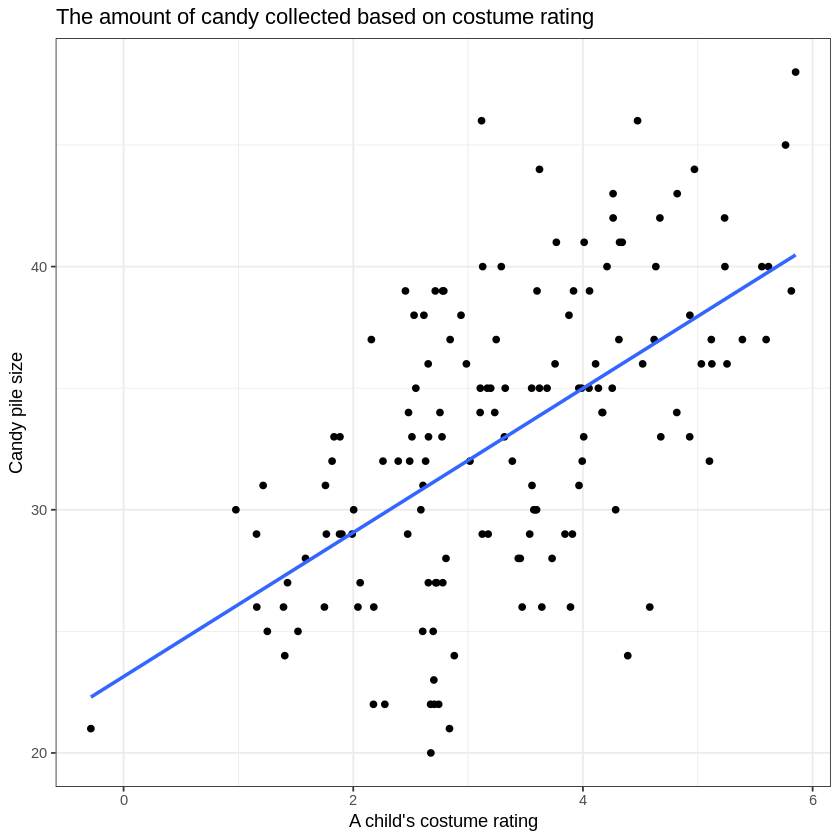

In [14]:
## Plot the line of best fit for the data
ggplot(data = TrickyData, mapping = aes(x = Costume, y = Candy)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, formula = y ~ x) +
  labs(x = "A child's costume rating",
       y = "Candy pile size",
       title = "The amount of candy collected based on costume rating") +
  theme_bw()

## Visualizing Age and Candy

We can see a generally negative relationship between the child's age and how much candy they get. Older kids get less candy. Isn't aging fun?

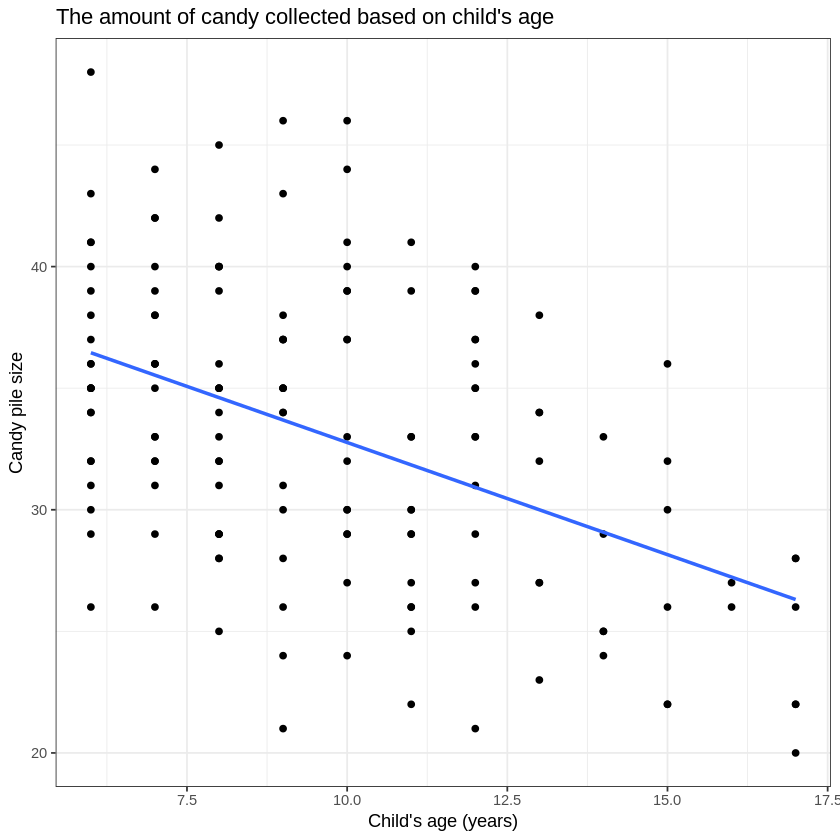

In [15]:
## Generate a scatterplot of the excitement and candy returns with a regression line
ggplot(data = TrickyData, mapping = aes(x = Age, y = Candy)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, formula = y ~ x) +
  labs(x = "Child's age (years)",
       y = "Candy pile size",
       title = "The amount of candy collected based on child's age") +
  theme_bw()

# Effect of costume rating on the candy collection

Here, we are interested in the dependent variable of the amount of candy received based on the independent variable of a child's costume rating during Halloween.

The regression equation is as follows: $\hat{y}_i = b_0 + b_1 \cdot Costume$

We can change these 'placeholder' names from the regression equation to better understand what our linear model is describing:
$\hat{Candy} \sim intercept + b_1 \cdot Costume$

Basically, we are estimating Candy (hence the hat or ^ above it to denote it is estimated) based on an intercept value and a slope based on the costume rating. In other words, we are predicting candy received based on the costume ratings.

In [16]:
## Predicting the amount of candy based on costume scores
ModCostume <- lm(Candy ~ Costume, data = TrickyData)

## Report the estimated model parameters (i.e., slope & intercept)
parameters(ModCostume)

Parameter,Coefficient,SE,CI,CI_low,CI_high,t,df_error,p
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
(Intercept),23.140034,1.2186214,0.95,20.731617,25.54845,18.988698,146,2.822940e-41
Costume,2.963292,0.3461684,0.95,2.279143,3.64744,8.560262,146,1.433749e-14


The linear model (LM) is estimated in the first line of code. Candy is the outcome, costume is the predictor, and these variables are found in the TrickyData object.

The second line of code uses easystats to display the regression model output from our linear model above. Notice that we save the output of the linear model as an object (ModCostume to denote it is the linear model with costume as the predictor).

The coefficients displayed next to the parameters tell us the estimated coefficients to maximize our prediction of the Candy variable based on the costume variable.


## Interpret the regression equation

Filling in the equation with the estimated parameters, we have the following: $\hat{Candy} = 23.14 + 2.96 \cdot Costume$.

*Intercept* (i.e., $b_0$): When costumes are rated 0, we can expect a child to receive about 23.14 pieces of candy.

*Slope* (i.e., $b_1$): For every 1-unit increase in costume ratings, we can expect there to be an _increase_ of 2.96 pieces of candy.

## Finding predicted candy based on costume rating

We can insert values for the costume variable in the equation above to get our predicted candy volume.

Let's say we have two children. One wanted an elegant costume that was given a 5/5 rating and the other child wanted a costume that nobody understand and was given a 3/5 rating. How much candy can we expect them to have based on our historical data (i.e., our regression model)?

In [18]:
## Create objects for children costume scores
Child1 <- 5
Child2 <- 3

## Child 1 predicted candy levels:
23.14 + (2.96 * Child1)

## Child 2 predicted candy levels:
23.14 + (2.96 * Child2)

[1] 37.94

[1] 32.02

The better costume is earning a few more pieces of candy, almost 38 pieces compared to 32 pieces.

# Compare the equation to the visualization

Now that we have estimated our regression model on the data, we can look back at our visualization. The graphic below is the same as the one above with two vertical lines showing costume ratings of 3 and 5 and two horizontal lines represented the predicted candy values. See how the costume value of 3 intersects the blue line at the first brown dotted line at 32.02 of the y-axis? The blue line is our predicted values from a regression model. The costume value of 5 (vertical red dashed line) intersects with the predicted values (blue line) at roughly 38 (horizontal brown dotted line). That is how we interpret our line of best fit and now we know that those lines of best fit we've seen before are based on regression models! Well, often at least.

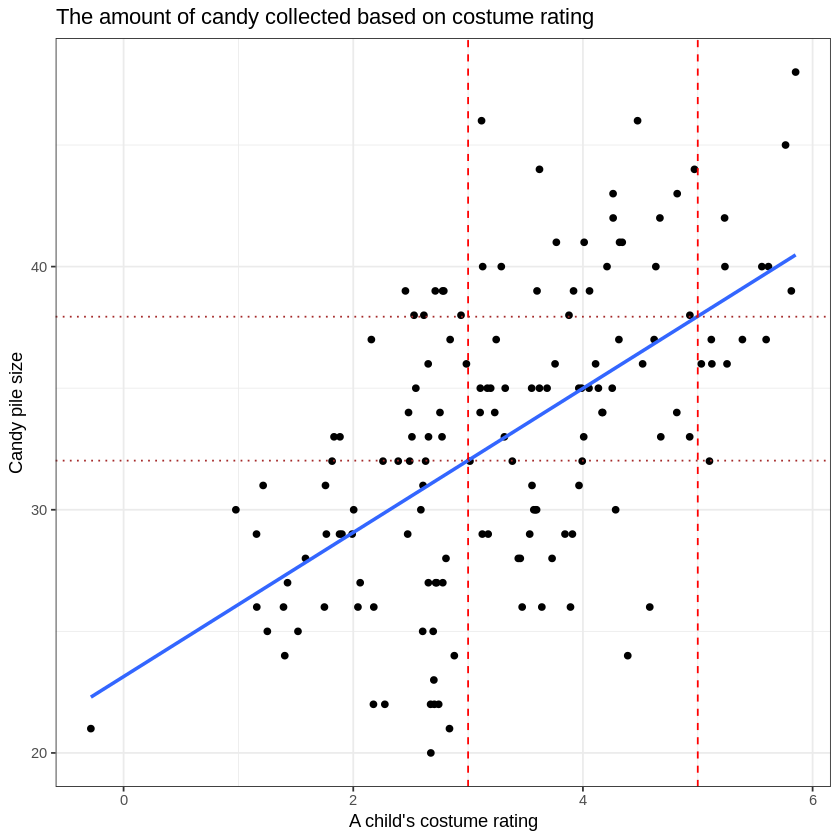

In [23]:
## Plot the line of best fit for the data
ggplot(data = TrickyData, mapping = aes(x = Costume, y = Candy)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, formula = y ~ x) +
  labs(x = "A child's costume rating",
       y = "Candy pile size",
       title = "The amount of candy collected based on costume rating") +
  geom_vline(xintercept = c(3, 5), linetype = "dashed", color = "red") +
  geom_hline(yintercept = c(32.02, 37.94), linetype = "dotted", color = "brown") +
  theme_bw()

# Effect of child's age on the candy collection

Here, we are interested in the dependent variable of the amount of candy received based on the independent variable of a child's age during trick-or-treating.

The regression equation is as follows: $\hat{y}_i = b_0 + b_1 \cdot Age$

In [ ]:
## Predicting the amount of candy based on costume scores
ModAge <- lm(Candy ~ Age, data = TrickyData)

## Report the estimated model parameters (i.e., slope & intercept)
parameters(ModAge)

## Interpret the regression equation

Filling in the equation with the estimated parameters, we have the following: $\hat{Candy} = 41.99 - 0.92 * Age$.

*Intercept* (i.e., $b_0$): At an age of 0, we can expect a child to receive about 41.99 pieces of candy.

*Slope* (i.e., $b_1$): For every 1-unit increase in age, we can expect there to be a _decrease_ of 0.92 pieces of candy.